# Unsupervised Learning

supervised learning involves training a machine learning model with data mapped to a target. The model learns the mapping and given a test data outside of the training data, it is able to make predictions

Unsupervised learning necessitates no training data mapped to a target. Infact, there is no training involved. The algorithms are able to generate various insights into the data and hence called unsupervised learning. One popular example of unsupervised learning is clustering and dimensionality reduction(PCA)

### -Supervised: All data is labeled and the algorithms learn to predict the output from the input data.

### -Unsupervised: All data is unlabeled and the algorithms learn to inherent structure from the input data.

### -Semi-supervised: Some data is labeled but most of it is unlabeled and a mixture of supervised and unsupervised techniques can be used.

# Clustering

Finding groups based on a criterion in the dataset is called clustering. The criterion could be a spatial distribution involving distance between nearby points or could involve another metric such as density based on presence of neighbors. A basic clustering algorithm is called k-means clustering which is a spatial clustering algorithm

## k-means clustering


https://medium.com/machine-learning-for-humans/unsupervised-learning-f45587588294

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/kmeans.PNG)

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/kmeans1.PNG)

-

-
-With k-means clustering, we want to cluster our data points into k groups. A larger k creates smaller groups with more granularity, a lower k means larger groups and less granularity

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/kmeans2.PNG)

-

--The output of the algorithm would be a set of “labels” assigning each data point to one of the k groups. In k-means clustering, the way these groups are defined is by creating a centroid for each group

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/kmeans3.PNG)

-

--The centroids are like the heart of the cluster, they “capture” the points closest to them and add them to the cluster

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/kmeans4.PNG)

-

-each cluster is moved to the new computed centroid

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/kmeans5.PNG)

-

--Reassign data to the new closest centroid

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/kmeans6.PNG)

### We Use ELBOW METHOD to find number of clusters

In order to use the k-Means method we have to find the optimal number k of clusters for the given dataset. In some cases (as in the following), the so-called “elbow method” can be used to determine a nearly-optimal number k of clusters

https://pythonprogramminglanguage.com/kmeans-elbow-method/

![alt text](https://pythonpro-9329.kxcdn.com/wp-content/uploads/2017/07/elbow-method.png)

### in above example k value is 3 since there is a elbow(change) in the graph

# Example:1 College_data.csv(kmeans clustering){we know number of cluster}

here we will do cluster between a private and a public university

## Step-1 import statments

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

## Step-2 load the dataset

In [272]:
data=pd.read_csv('https://raw.githubusercontent.com/praneethmetuku/file/master/College_Data.csv',index_col=0)

In [273]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [275]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [276]:
data.isnull().any()

Private        False
Apps           False
Accept         False
Enroll         False
Top10perc      False
Top25perc      False
F.Undergrad    False
P.Undergrad    False
Outstate       False
Room.Board     False
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni    False
Expend         False
Grad.Rate      False
dtype: bool

## Step-3 visualize the data

In [277]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


we will see some scatter plots(use regplot of lmplot in seaborn to view scatter plot)

In [278]:
sns.set_style('whitegrid')
sns.set_palette('cubehelix')

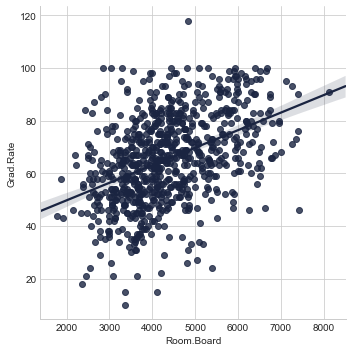

In [279]:
sns.lmplot(x='Room.Board',y='Grad.Rate',data=data)

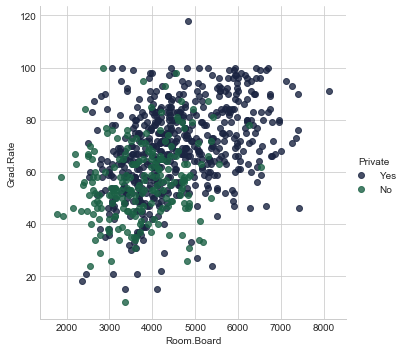

In [280]:
sns.lmplot(x='Room.Board',y='Grad.Rate',data=data,hue='Private',fit_reg=False)

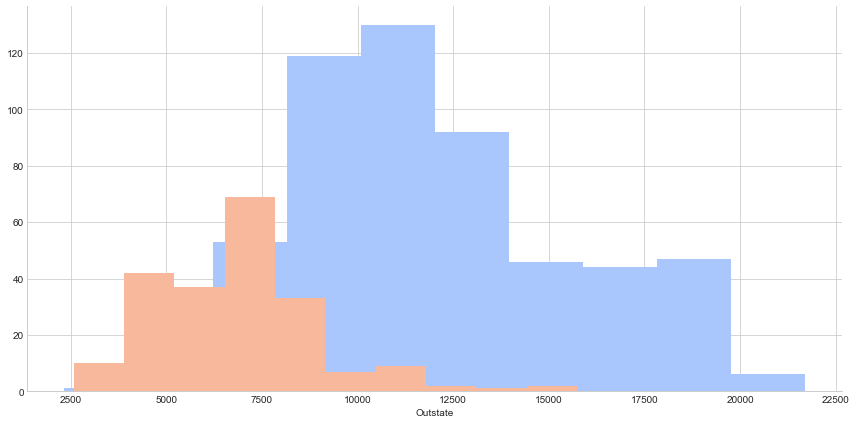

In [281]:
g = sns.FacetGrid(data,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Outstate')

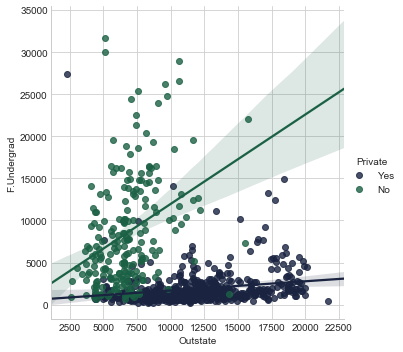

In [282]:
sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=data, hue='Private')

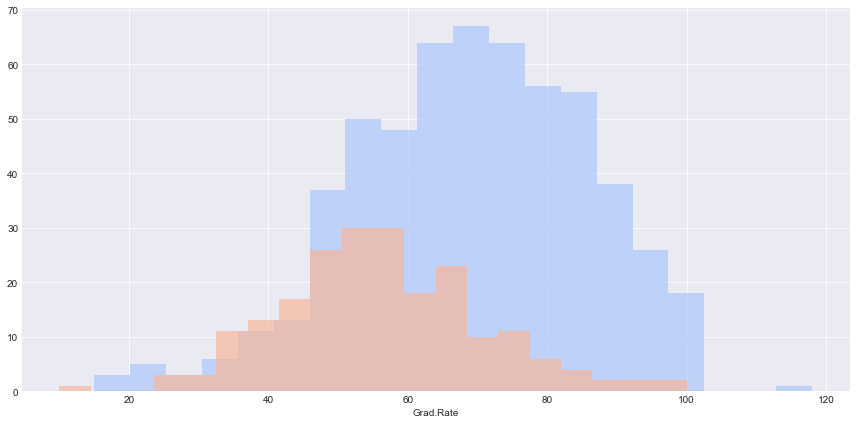

In [283]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [284]:
#Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?
data[data['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


C:\Users\metuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


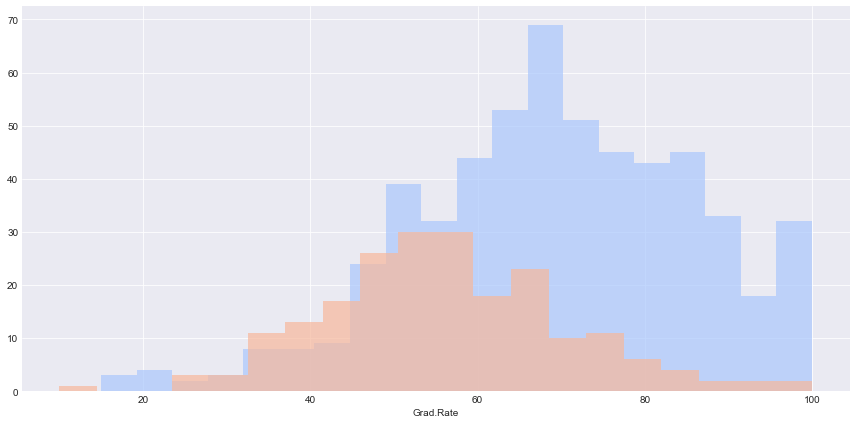

In [285]:
#Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, 
#so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.
data['Grad.Rate']['Cazenovia College'] = 100
data[data['Grad.Rate'] > 100]
sns.set_style('darkgrid')
g = sns.FacetGrid(data,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

## Step-4 Kmeans cluster creation

In [286]:
from sklearn.cluster import KMeans

In [287]:
kmeans=KMeans(n_clusters=2)

In [288]:
x=data.drop('Private',axis=1)

In [289]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [290]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

## Step-5 evaluate model

In [291]:
y_pred=kmeans.fit_predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [292]:
x[y_pred==1]

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Antioch University,713,661,252,25,44,712,23,15476,3336,400,1100,69,82,11.3,35,42926,48
Appalachian State University,7313,4664,1910,20,63,9940,1035,6806,2540,96,2000,83,96,18.3,14,5854,70
Arizona State University Main campus,12809,10308,3761,24,49,22593,7585,7434,4850,700,2100,88,93,18.9,5,4602,48
Auburn University-Main Campus,7548,6791,3070,25,57,16262,1716,6300,3933,600,1908,85,91,16.7,18,6642,69
Baylor University,6075,5349,2367,34,66,9919,484,6450,3920,600,1346,71,76,18.5,38,7503,72
Boston University,20192,13007,3810,45,80,14971,3113,18420,6810,475,1025,80,81,11.9,16,16836,72
Bowling Green State University,9251,7333,3076,14,45,13699,1213,7452,3352,600,1700,81,89,21.1,14,6918,67
Brigham Young University at Provo,7365,5402,4615,48,82,27378,1253,2340,3580,860,1220,76,76,20.5,40,7916,33
Brown University,12586,3239,1462,87,95,5643,349,19528,5926,720,1100,99,100,7.6,39,20440,97
California Polytechnic-San Luis,7811,3817,1650,47,73,12911,1404,7380,4877,612,2091,72,81,19.8,13,8453,59


In [293]:
x[y_pred==0]

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
Albertus Magnus College,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
Albion College,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
Albright College,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
Alderson-Broaddus College,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [294]:
kmeans.fit(data.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [295]:
x[y_pred==0]['Grad.Rate'].mean()

65.09267563527654

In [296]:
x[y_pred==1]['Grad.Rate'].mean()

67.5925925925926

# Example-2 mall_data.csv(kmean){we dont know the number of cluster, we predict with elbow method}

here we will do cluster based on the spending score and annual income

## Step-1 load import statements

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

## Step-2 load the dataset

In [298]:
data=pd.read_csv('https://raw.githubusercontent.com/praneethmetuku/file/master/Mall_Customers.csv')

In [299]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [300]:
data.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [301]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


## Step-3 visualize the dataset

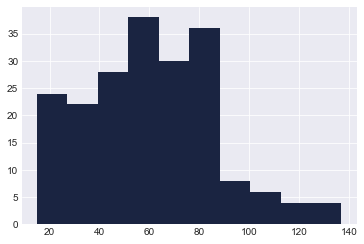

In [302]:
data['Annual Income (k$)'].hist()

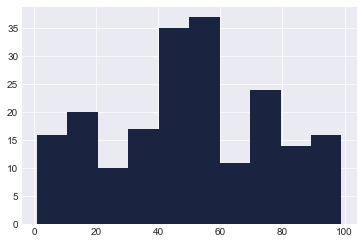

In [303]:
data['Spending Score (1-100)'].hist()

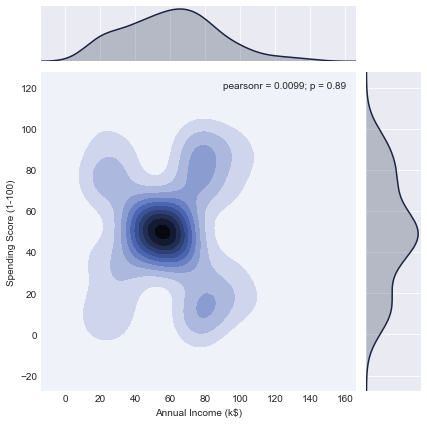

In [304]:
sns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data,kind='kde')

## Step-4 define number of clusters

here we do clusters based on annual income and spending score

In [305]:
x=data[['Annual Income (k$)','Spending Score (1-100)']]

In [306]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Elbow method

In [307]:
from sklearn.cluster import KMeans
clust=[]
for i in range(1,12):
    kmeans=KMeans(n_clusters=i,n_init=11)
    kmeans.fit(x)
    clust.append(kmeans.inertia_)

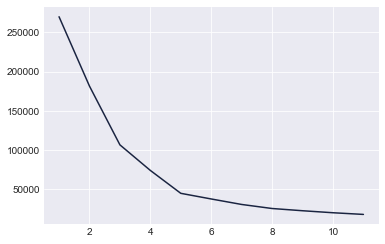

In [308]:
plt.plot(range(1,12),clust)

### So the k-clusters value is 5

## Step-5 kmeans cluster creation

In [309]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
y_pred=kmeans.fit_predict(x)
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

## Step-6 visualize clusters prediction

In [310]:
x=x.values

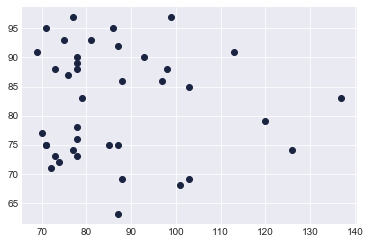

In [311]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1]) #here 0 is the cluster 0 and 1 is spending score inx[y_pred==0,1]

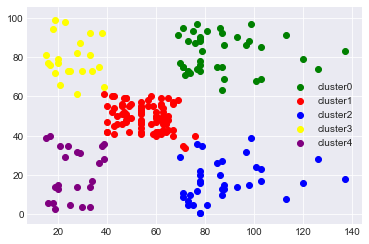

In [318]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],c='green',label='cluster0')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],c='red',label='cluster1')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],c='blue',label='cluster2')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],c='yellow',label='cluster3')
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],c='purple',label='cluster4')
plt.legend()
plt.show()

### For centroids clusters

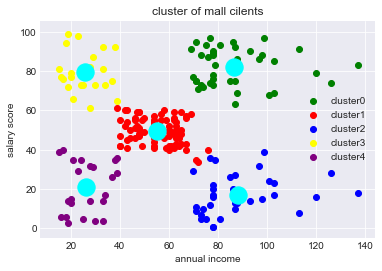

In [317]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],c='green',label='cluster0')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],c='red',label='cluster1')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],c='blue',label='cluster2')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],c='yellow',label='cluster3')
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],c='purple',label='cluster4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='cyan')
plt.title('cluster of mall cilents')
plt.xlabel('annual income')
plt.ylabel('salary score')
plt.legend()
plt.show()

# Exampl-3 Iris dataset{kmeans}

In [319]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [320]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [321]:
iris.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

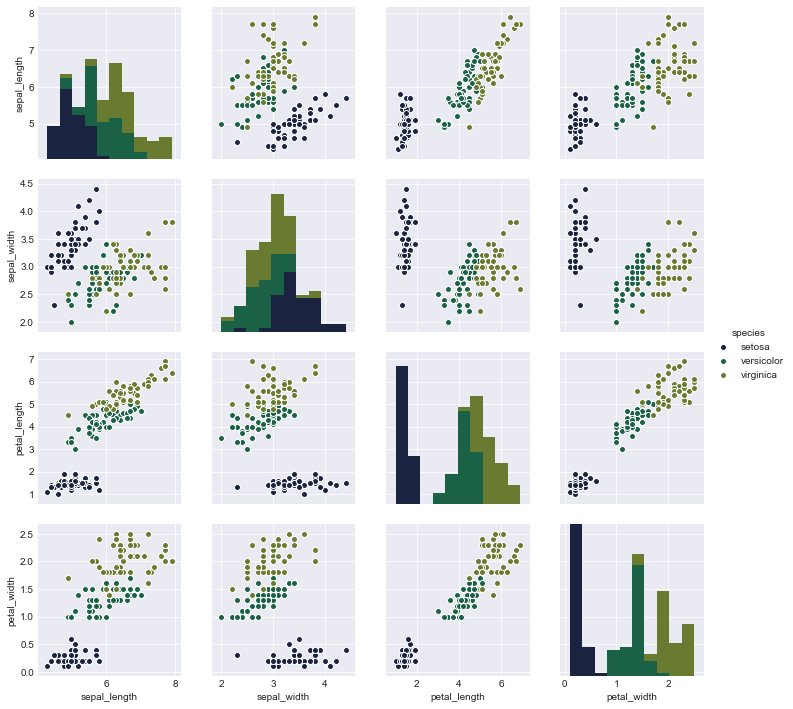

In [322]:
sns.pairplot(iris,hue='species')

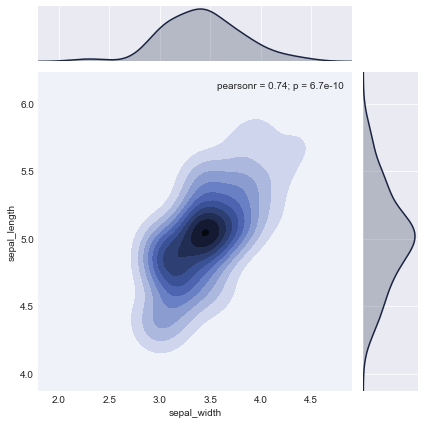

In [324]:
setosa = iris[iris['species']=='setosa']
sns.jointplot( setosa['sepal_width'], setosa['sepal_length'],kind='kde')

In [326]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [342]:
x=iris.drop('species',axis=1)

### we know no of cluster is 3 lets check in elbow method

In [343]:
from sklearn.cluster import KMeans
clust=[]
for i in range(1,12):
    kmeans=KMeans(n_clusters=i,n_init=11)
    kmeans.fit(x)
    clust.append(kmeans.inertia_)

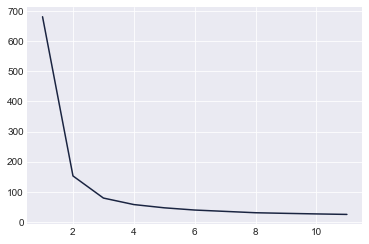

In [344]:
plt.plot(range(1,12),clust)

### K-cluster value is 3

In [345]:
from sklearn.cluster import KMeans
kmean=KMeans(n_clusters=3)
y_pred=kmean.fit_predict(x)

In [346]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [358]:
x[y_pred==2]

,sepal_length,sepal_width,petal_length,petal_width
52,6.9,3.1,4.9,1.5
77,6.7,3.0,5.0,1.7
100,6.3,3.3,6.0,2.5
102,7.1,3.0,5.9,2.1
103,6.3,2.9,5.6,1.8
104,6.5,3.0,5.8,2.2
105,7.6,3.0,6.6,2.1
107,7.3,2.9,6.3,1.8
108,6.7,2.5,5.8,1.8
109,7.2,3.6,6.1,2.5
